In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h1b_df = pd.read_csv("/Users/abhishekkumar/Documents/blah/kaggle/h1bvisa/h1b_kaggle.csv",header = 0)

In [3]:
h1b_df.shape

(3002458, 11)

In [4]:
h1b_df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [5]:
h1b_df.dtypes

Unnamed: 0              int64
CASE_STATUS            object
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE               object
lon                   float64
lat                   float64
dtype: object

In [6]:
h1b_df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [7]:
# a few  columns contain null . I want to drop rows which have null value for CASE_STATUS, FULL_TIME_POSITION, 
#PREVAILING_WAGE, YEAR
h1b_df = h1b_df.dropna(0, subset = ["CASE_STATUS", "FULL_TIME_POSITION", "PREVAILING_WAGE", "YEAR" ])
#just to check
h1b_df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME               17717
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107229
lat                   107229
dtype: int64

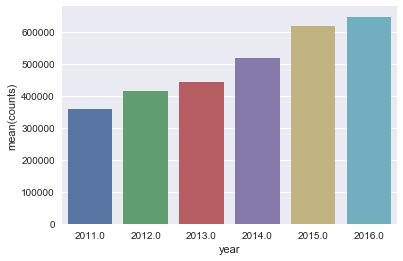

In [8]:
#lets check year wise distribution
#1 count by year
year_count_series = h1b_df["YEAR"].value_counts()
year_count_df = year_count_series.to_frame()
year_count_df = year_count_df.reset_index()
#rename columns from (index, type) to (type , count)
year_count_df.columns = ["year", "counts"]
sns.barplot(y=year_count_df['counts'],x=year_count_df['year'])

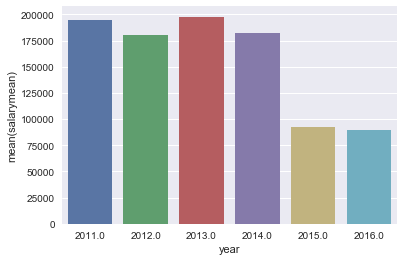

In [9]:
#salary year wise
salary_year_mean_series = h1b_df.groupby("YEAR")["PREVAILING_WAGE"].mean()
salary_year_mean_df = salary_year_mean_series.to_frame()
salary_year_mean_df = salary_year_mean_df.reset_index()
#rename columns from (index, type) to (type , count)
salary_year_mean_df.columns = ["year", "salarymean"]
sns.barplot(y=salary_year_mean_df['salarymean'],x=salary_year_mean_df['year'])

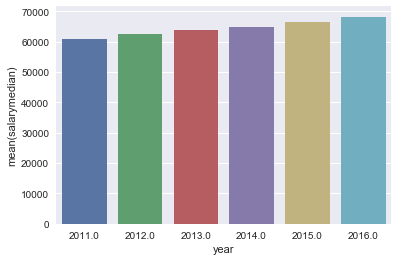

In [10]:
#salary year wise
salary_year_median_series = h1b_df.groupby("YEAR")["PREVAILING_WAGE"].median()
salary_year_median_df = salary_year_median_series.to_frame()
salary_year_median_df = salary_year_median_df.reset_index()
#rename columns from (index, type) to (type , count)
salary_year_median_df.columns = ["year", "salarymedian"]
sns.barplot(y=salary_year_median_df['salarymedian'],x=salary_year_median_df['year'])
#median wage increasing with year

In [11]:
h1b_df["CASE_STATUS"].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

In [12]:
h1b_df.groupby("YEAR")["CASE_STATUS"].value_counts()
# used h1b_df.groupby("YEAR")["CASE_STATUS"].value_counts().sum() to verify


YEAR    CASE_STATUS                                       
2011.0  CERTIFIED                                             307936
        DENIED                                                 29125
        CERTIFIED-WITHDRAWN                                    11596
        WITHDRAWN                                              10097
2012.0  CERTIFIED                                             352668
        CERTIFIED-WITHDRAWN                                    31118
        DENIED                                                 21074
        WITHDRAWN                                              10721
2013.0  CERTIFIED                                             382951
        CERTIFIED-WITHDRAWN                                    35432
        DENIED                                                 12120
        WITHDRAWN                                              11585
        PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED        15
2014.0  CERTIFIED                           

In [18]:
#year_status_df = h1b_df.loc[:,["YEAR", "CASE_STATUS"]]
year_status_count = h1b_df.groupby("YEAR")["CASE_STATUS"].value_counts()
year_status_count.unstack().columns.values

array(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', 'REJECTED',
       'WITHDRAWN'], dtype=object)

In [15]:
h1b_df["YEAR"].unique()

array([ 2016.,  2015.,  2014.,  2013.,  2012.,  2011.])

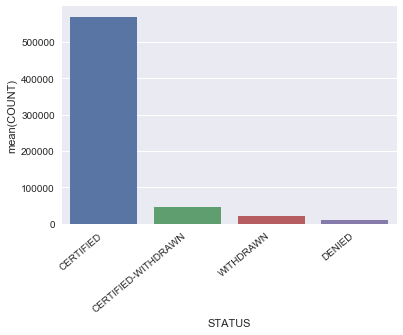

In [49]:
year_index = h1b_df["YEAR"].values == 2016.0
year_df = pd.DataFrame(h1b_df[year_index]["CASE_STATUS"].value_counts().reset_index())
year_df.columns = ["STATUS", "COUNT"];
bar_chart = sns.barplot(x = year_df["STATUS"], y = year_df["COUNT"] )
bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation=40, ha="right")

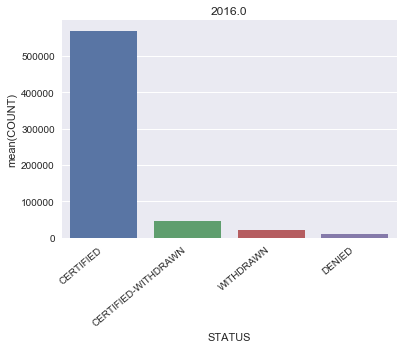

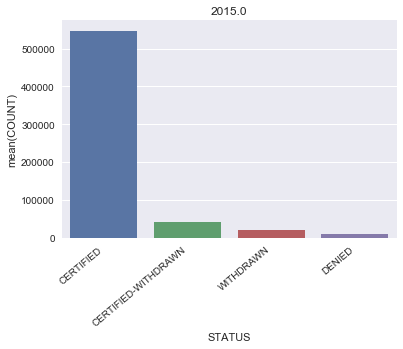

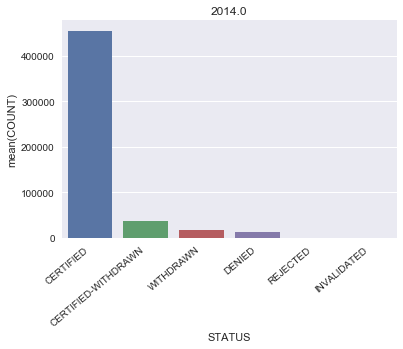

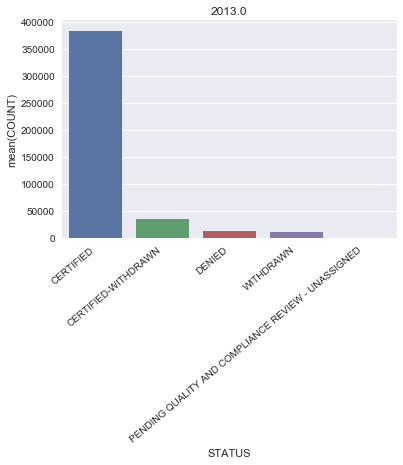

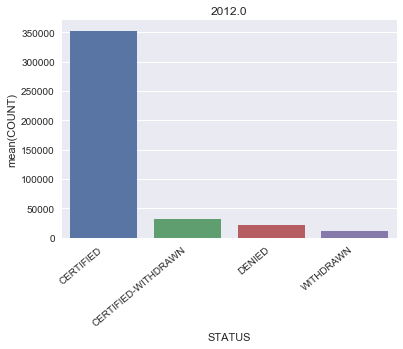

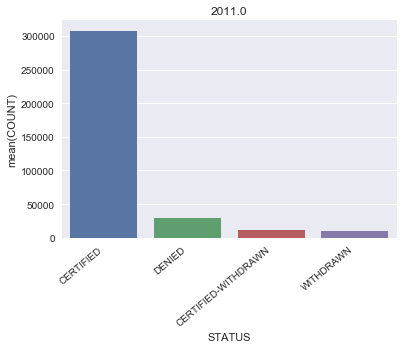

In [56]:
year_array = h1b_df["YEAR"].unique()
for year in year_array:
    year_index = h1b_df["YEAR"].values == year
    year_df = pd.DataFrame(h1b_df[year_index]["CASE_STATUS"].value_counts().reset_index())
    year_df.columns = ["STATUS", "COUNT"];
    plt.figure()
    bar_chart = sns.barplot(x = year_df["STATUS"], y = year_df["COUNT"] )
    bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation=40, ha="right")
    bar_chart.set_title(year)